# Linear regression

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/insop/ML_crash_course/blob/main/2_linear_regression.ipynb)

## Overview
- recap from previous [notebook](https://github.com/insop/ML_crash_course/blob/main/1_ml_overview.ipynb)
- linear regression framework
- type: which predictor?
- loss function: how good is the predictor?
- optimization: how to compute the best predictor?
- sample example
***

## Recap from [previous notebook](https://github.com/insop/ML_crash_course/blob/main/1_ml_overview.ipynb)

- ML as a way to <font color='blue'>predict</font> target values or types by using training dataset.
- Classification task predicts categories 
- Regression tasks predicts real numbers.

- Supervised learning uses labeled dataset to train
- Unsupervised learning tryies to cluster
- A simple regression example

- `numpy` and `pandas`.
***

Previously, we have reviewed ML as a way to predict target values or types by using training dataset. Classification task predicts categories and regression tasks predicts real numbers.

For the type of training, supervised learning uses labeled dataset to train and unsupervised learning tryies to cluster or find implcit information from unlabeled dataset.
We havre reviewed a simple regression task that predicts life expectancy based on GDP per capita

For the tools, we have reviewed `numpy` and `pandas`.
***

## Linear regression

- Whe we have these point pairs, can we predict $y$ for new $x$, such as 3?
- $x$ :[1,2,4], $y$:[1,3,3], *i.e.* $(x,y)$ = (1,1), (2,3), (4,3)

<div>
<img src="figures/linear_regression_example_1.png" width="500"/>
</div>

***

We have training data, as a set of examples. Each example consist of input $x$ and output $y$ as you see the plot in the previous cell.

## Linear regression
- if we can learn this linear line, then we can predict $y$ given new $x$

<div>
<img src="figures/linear_regression_example_2.png" width="500"/>
</div>

***

Linear regression learning algorithm uses input data and predicts model $f$. This model can make prediction on new inputs. For example $x=3$ as in the figure above.

## Linear regression

- predicts values based on input dataset
- $x$ (input) $\rightarrow$ $f$ (predictor) $\rightarrow$ $\hat{y}$ (output)
- How to design predictor?
    - what type of predictor to use:
    - **loss function**: how to measure the goodness?
    - **optimization**: how to compute the predictor? 
***

There are three decisions to make for linear regression framework, and also similar to other learning methods as well. First, we need to decide what type of predictors to use to form $f$, such as linear line or other form. Second, we need to measure how good the predictor? This is called *loss function*. Third, we need a way to learn the predictor. This is called *optimization*.

## Linear regression

- type of predictor: $w \in \mathbb{R}^2$
- we want to find $f_w(x) = w_1 x + w_2$
- **weight vector**: $W= [w_1, w_2]$
- **feature vector**: $\phi(x) = [x, 1]$
- $f_w(x) = W \cdot \phi(x)$ = $w_1 x + w_2 1$

<div>
<img src="figures/linear_regression_example_3.png" width="500"/>
</div>

***

## Loss function: how good is a predictor?

<div>
<img src="figures/linear_regression_example_4.png" width="500"/>
</div>

***

## Loss function: how good is a predictor?

- $Loss(x, y, W)$ = $(f_w(x) - y)^2$, **squared loss**, ($f_w(x) = w_1 x + w_2$)
- Train_loss($W$) = $\frac{1}{|D_{train}|}\sum_{{(x,y)}\in D_{train}} Loss(x, y, W)$
- Example with $W = [0.7,1]$
    - Loss($1,1,W$) = $(0.7\times1 + 1 - 1)^2$
    - Loss($2,3,W$) = $(0.7\times2 + 3 - 3)^2$
    - Loss($4,3,W$) = $(0.7\times4 + 3 - 3)^2$
    - Train_loss($W$) = $\frac{1}{3}$(Loss($1,1,W$) + Loss($2,3,W$) + Loss($4,3,W$))
    - See the example code below


***

In [1]:
# Loss calculation example

import numpy as np

training_data = {
    'x':[1,2,4], 
    'y':[1,3,3]}

# [0.7, 1]: gree
# [0.3, 2]: red
# [0.57, 1]: other
Ws = [[0.7, 1], [0.3, 2], [-1,-1]]

def phi(x):
    """Get feature of x"""
    return np.array([x, 1])

def dot(X, Y):
    """ Do the dot product """
    return sum([x*y for x, y in zip(X, Y)])

for w in Ws:
    """Evaluate w's loss"""
    print()
    losses = []
    for i,(x,y) in enumerate(zip(training_data['x'], training_data['y'])):
        phi_x = phi(x)

        loss = (dot(w, phi_x) - y)**2
        losses.append(loss)

#         print("loss_{}: {}".format(i, loss))
    print("Total loss for {}: {}".format(w, sum(losses)/len(losses)))
    


Total loss for [0.7, 1]: 0.4966666666666666

Total loss for [0.3, 2]: 0.6299999999999998

Total loss for [-1, -1]: 36.333333333333336


## Visualizing loss function

- Train_loss($W$) = $\frac{1}{|D_{train}|}\sum_{{(x,y)}\in D_{train}} Loss(x, y, W)$

<div>
<img src="figures/loss_visualization.png" width="500"/>
</div>

Figure is from Ref[2]
***

## Optimization: how to find the best $W$?
- **Goal**: find *minimum* Train_loss($W$)
    - min$_w$ Train_loss($W$)
- **gradient**: the gradient $\nabla_w$ Train_loss($W$) is the direction that *increases* the training loss the most
- **Gradient descent** algorithm
    - initialize $w$ = [0, ... 0]
    - set $\eta$, step size (learning rate)
    - For t = 1, ..., T: # called epochs
        - $w \leftarrow w - \eta$ $\nabla$ Train_loss($W$) 
***

## Computing the gradient

- Train_loss($W$) = $\frac{1}{|D_{train}|}\sum_{{(x,y)}\in D_{train}} (W \cdot \phi(x) - y)^2$

- Gradient
    - $\nabla_w$ Train_loss($W$) = $\frac{1}{|D_{train}|}\sum_{{(x,y)}\in D_{train}} 2(W \cdot \phi(x) - y)\phi(x)$
    - We are doing gradient with respect $W$, so other terms can be considered as constant, then we can apply chain rules.
- See the example code below
   
***

The following program runs the gradient descent to fit the model to the dataset.

In [1]:
# Gradient descent example

import numpy as np

training_data = {
    'x':[1,2,4], 
    'y':[1,3,3]}

def phi(x):
    """Get feature of x"""
    return np.array([x, 1])

def dot(A, B):
    """ Do the dot product """
    return sum([a*b for a, b in zip(A, B)])

debug=False
eta = 0.1
w = np.array([0, 0])

for t in range(500):
    gradients = []
    for i, (x,y) in enumerate(zip(training_data['x'], training_data['y'])):
        phi_x = phi(x)
        gradient = (2*(dot(w, phi_x)-y)*phi_x)
        gradients.append(gradient)
    w = w - eta* sum(gradients)/len(gradients)
    if debug:
        print(sum(gradients)/len(gradients), w)

print()
print("Final weight: {}".format(w))

    


Final weight: [0.57142857 1.        ]


## Can we predict more complex data

- How do we predict dataset has non linear distribution?
<div>
<img src="figures/linear_regression_example_5.png" width="500"/>
</div>


***

## Quadratic predictors with quadratic features

- With a feature function, we can fit nonlinear data
- $\phi(x) = [x^2, x, 1]$
    - Example, $\phi(3) = [3^2, 3, 1]$
- $f_w(x) = W \cdot \phi(x)$ = $w_1 x^2 + w_2 x + w_3$
- we use the same predictor and gradient descent to fit the dataset

<div>
<img src="figures/linear_regression_example_6.png" width="500"/>
</div>

***

Saving figure linear_regression_example_5


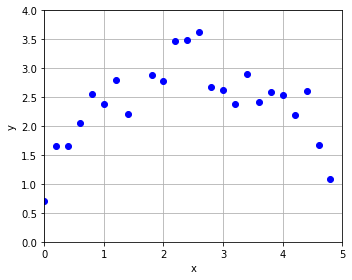

In [4]:
"""generate and plot for non linear dataset"""


import sklearn
import sys

import matplotlib.pyplot as plt # graph
import numpy as np # number handling
import pandas as pd # structured data handling
import sklearn.linear_model
import os

# enable this when running locally
from utils import save_fig

from matplotlib.pyplot import figure

#figure(figsize=(4.5, 3.5), dpi=80)
plt.figure(figsize=(5,4))
# linear regression sample data set and plot

x = np.arange(0,5,0.2)
x_data = x
x.shape
noise = np.random.normal(loc=0.0, scale=0.4, size=x.shape[0])


y = -.25*(x-2.5)*(x-2.5) + 3
y+= noise

training_data = {
    'x':x, 
    'y':y}

plt.clf()
plt.axis([0, 5, 0, 4])
plt.plot(training_data['x'], training_data['y'] ,'bo')
plt.xlabel("x")
plt.ylabel("y")
plt.grid()
plt.tight_layout()

save_fig("linear_regression_example_5")


Final weight: [-0.31841517  1.54901773  1.27867285]
Saving figure linear_regression_example_6


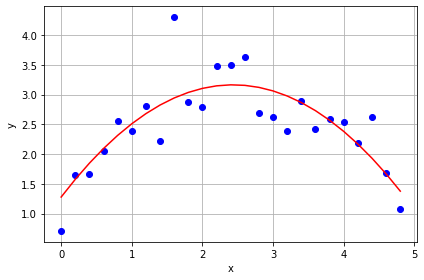

In [5]:
# Gradient descent example for quadratic predictor

import numpy as np


def phi(x):
    """Get feature of x"""
    return np.array([x*x, x, 1])

def dot(A, B):
    """ Do the dot product """
    return sum([a*b for a, b in zip(A, B)])

debug=False
eta = 0.001
w = np.array([0, 0, 0])
nepoch = 5000

for t in range(nepoch):
    gradients = []
    for i, (x,y) in enumerate(zip(training_data['x'], training_data['y'])):
        phi_x = phi(x)
        gradient = (2*(dot(w, phi_x)-y)*phi_x)
        
        gradients.append(gradient)
    w = w - eta* sum(gradients)/len(gradients)
    if debug:
        print(sum(gradients)/len(gradients), w)

print()
print("Final weight: {}".format(w))

y_pred = (w[0]*x_data*x_data + w[1]*x_data + w[2])
# import pdb;pdb.set_trace()
# print(y_pred)

# plt.clf()
# plt.axis([0, 5, 0, 4])
plt.plot(training_data['x'], training_data['y'] ,'bo')
plt.plot(training_data['x'], y_pred ,'r-')
plt.xlabel("x")
plt.ylabel("y")
plt.grid()
plt.tight_layout()

save_fig("linear_regression_example_6")

## Summary
- review linear regression
- how to form linear regression
- how to measure goodness of the hypothesis? *loss function*
- how to find the best parameters (weights)? *optimization*
- gradient descent method, $w \leftarrow w - \eta$ $\nabla$ Train_loss($W$) 
***

## Credits

This notebook uses the contents from the followring materials:

1. [ML linear regression](https://stanford-cs221.github.io/autumn2021-extra/modules/machine-learning/linear-regression.pdf)

***

## Further readings

1. Chapter 1 from Book [Hands-on Machine Learning with Scikit-Learn, Keras and TensorFlow](https://www.oreilly.com/library/view/hands-on-machine-learning/9781492032632/)
1. [ML linear regression](https://stanford-cs221.github.io/autumn2021-extra/modules/machine-learning/linear-regression.pdf)
1. [Jovian's Linear Regression with Scikit Learn](https://jovian.ai/learn/machine-learning-with-python-zero-to-gbms/lesson/linear-regression-with-scikit-learn)